# Prasid 
# PH21B007

# Square lattice 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numba

To run this file numpy, pandas, matplotlib, tqdm, numba these libraries are needed.

If you are getting module not found kind of error then write ! pip install lib_name at the top of the file before importing the lbraries.

e.g. ! pip install numpy

Here, we will use numba library, to increase the computational speed. 

In [2]:
# Setting Matplotlib plotting defaults
# Font
mpl.rcParams['font.family']           ='Serif'    # Setting Font family
mpl.rcParams['font.size']             = 18        # Setting Font size
# Figure
mpl.rcParams["figure.figsize"]        = (11, 7)   # Setting Figure size nearly equal to A4 sheet size
mpl.rcParams['savefig.dpi']           = 300       # Setting plot quality
mpl.rcParams['figure.dpi']            = 300       # High resolution for print quality
# Legend
mpl.rcParams["legend.fontsize"]       = 15        # Legend fontsize
mpl.rcParams["legend.title_fontsize"] = 15        # Legend fontsize
# Grid
mpl.rcParams["axes.grid"]             = True      # Setting grid to display
mpl.rcParams["grid.color"]            ='black'    # Setting grid color
mpl.rcParams['grid.linestyle']        ='--'       # Setting grid linestyle
mpl.rcParams['grid.linewidth']        = 0.5       # Setting grid linewidth
mpl.rcParams['grid.color']            ='gray'     # Setting grid color as gray
# xticks
mpl.rcParams["xtick.minor.visible"]   = True      # Setting visibility of xticks
mpl.rcParams['xtick.minor.width']     = 1.0       # Setting width of minor xticks
mpl.rcParams['xtick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['xtick.direction']       ='inout'    # Setting directions of xticks
mpl.rcParams['xtick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['xtick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['xtick.top']             = True      # Setting visibility of top minor xticks
# yticks
mpl.rcParams["ytick.minor.visible"]   = True      # Setting visibility of yticks
mpl.rcParams['ytick.minor.width']     = 1.0       # Setting width of minor yticks
mpl.rcParams['ytick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['ytick.direction']       ='inout'    # Setting directions of yticks
mpl.rcParams['ytick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['ytick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['ytick.right']           = True      # Setting visibility of top minor xticks

In [3]:
n = 10  # Lattice of size nxn
J_val = [1, -1]  # Coupling constant: Ferromagnetic (J=1) and Antiferromagnetic (J=-1)
t = np.linspace(0.5, 7.0, 120)  # Temperature range
N = 40000  # Monte Carlo steps per temperature

In [4]:
# Creating empty lists for storing the resutls
esfm = []
csfm = []
msfm = []
xsfm = []

esafm = []
csafm = []
msafm = []
xsafm = []

Defining functions useful for MonteCarlo Simualtions

In [5]:
@numba.njit       # Function to create the grid with random spin orentations.
def grid(n):   
    return np.random.choice(np.array([-1, 1]), size=(n, n))

In [6]:
@numba.njit           # Function to calculate the energy of the lattice
def energy(c, J):
    e = 0
    for i in range(n):
        for j in range(n):
            temp = c[i, j]
            ngb = c[(i+1)%n, j] + c[i, (j+1)%n] + c[(i-1)%n, j] + c[i, (j-1)%n] # There will be four neighbours for each lattice point in square lattice
            e += -J * temp * ngb
    return e / 2  # Each bond is counted twice

In [7]:
@numba.njit         # Function to perform the monte Carlo sweeps
def swip(c, J, t): 
    """ Perform a single Metropolis step """
    for k in range(n * n):  # Do the n x n updates comaparble of lattice size
        i, j = np.random.randint(0, n, size=2) # Pick the random site
        temp = c[i, j]
        ngb = c[(i+1)%n, j] + c[i, (j+1)%n] + c[(i-1)%n, j] + c[i, (j-1)%n]  
        de = 2 * J * temp * ngb  # Energy change if spin is flipped
        if de < 0 or np.random.rand() < np.exp(-de / t):  # Metropolis condition
            c[i, j] *= -1

In [8]:
@numba.njit      # Function to calculate the mean energy and Magnetization
def mean_ene_mag(c, J):
    """ Compute energy and magnetization """
    E = energy(c, J) / (n * n)
    M = np.abs(np.sum(c)) / (n * n)
    return E, M

Running the Main MonteCarlo Simulation

In [9]:
# Run Monte Carlo simulations for square lattice
for J in J_val: # Run the loop for Both J values
    e_avg = []
    c_avg = []
    m_avg = []
    x_avg = []

    for tempe in t: # Run the loop for all temperature values
        c = grid(n)
        e_samp = []
        m_samp = []

        for i in range(N): # Do the N number of MonteCarlo sweeps
            swip(c, J, tempe)
            if i > N // 2:  # Ignore first half as thermalization
                E, M = mean_ene_mag(c, J)
                e_samp.append(E)
                m_samp.append(M)

        # Compute averages and variances of energy and magnetization
        e_avg.append(np.mean(e_samp))
        c_avg.append((np.var(e_samp) / tempe**2) * n * n) # Specific heat is variance of energy
        m_avg.append(np.mean(m_samp))
        x_avg.append((np.var(m_samp) / tempe)) # Susceptibility is variance of magnetization
    
    # Store the values of Thermodynamic Properties in proper list depending on the J value
    if J == 1:
        esfm = e_avg
        csfm = c_avg
        msfm = m_avg
        xsfm = x_avg
    else:
        esafm = e_avg
        csafm = c_avg
        msafm = m_avg
        xsafm = x_avg


Plotting the Results

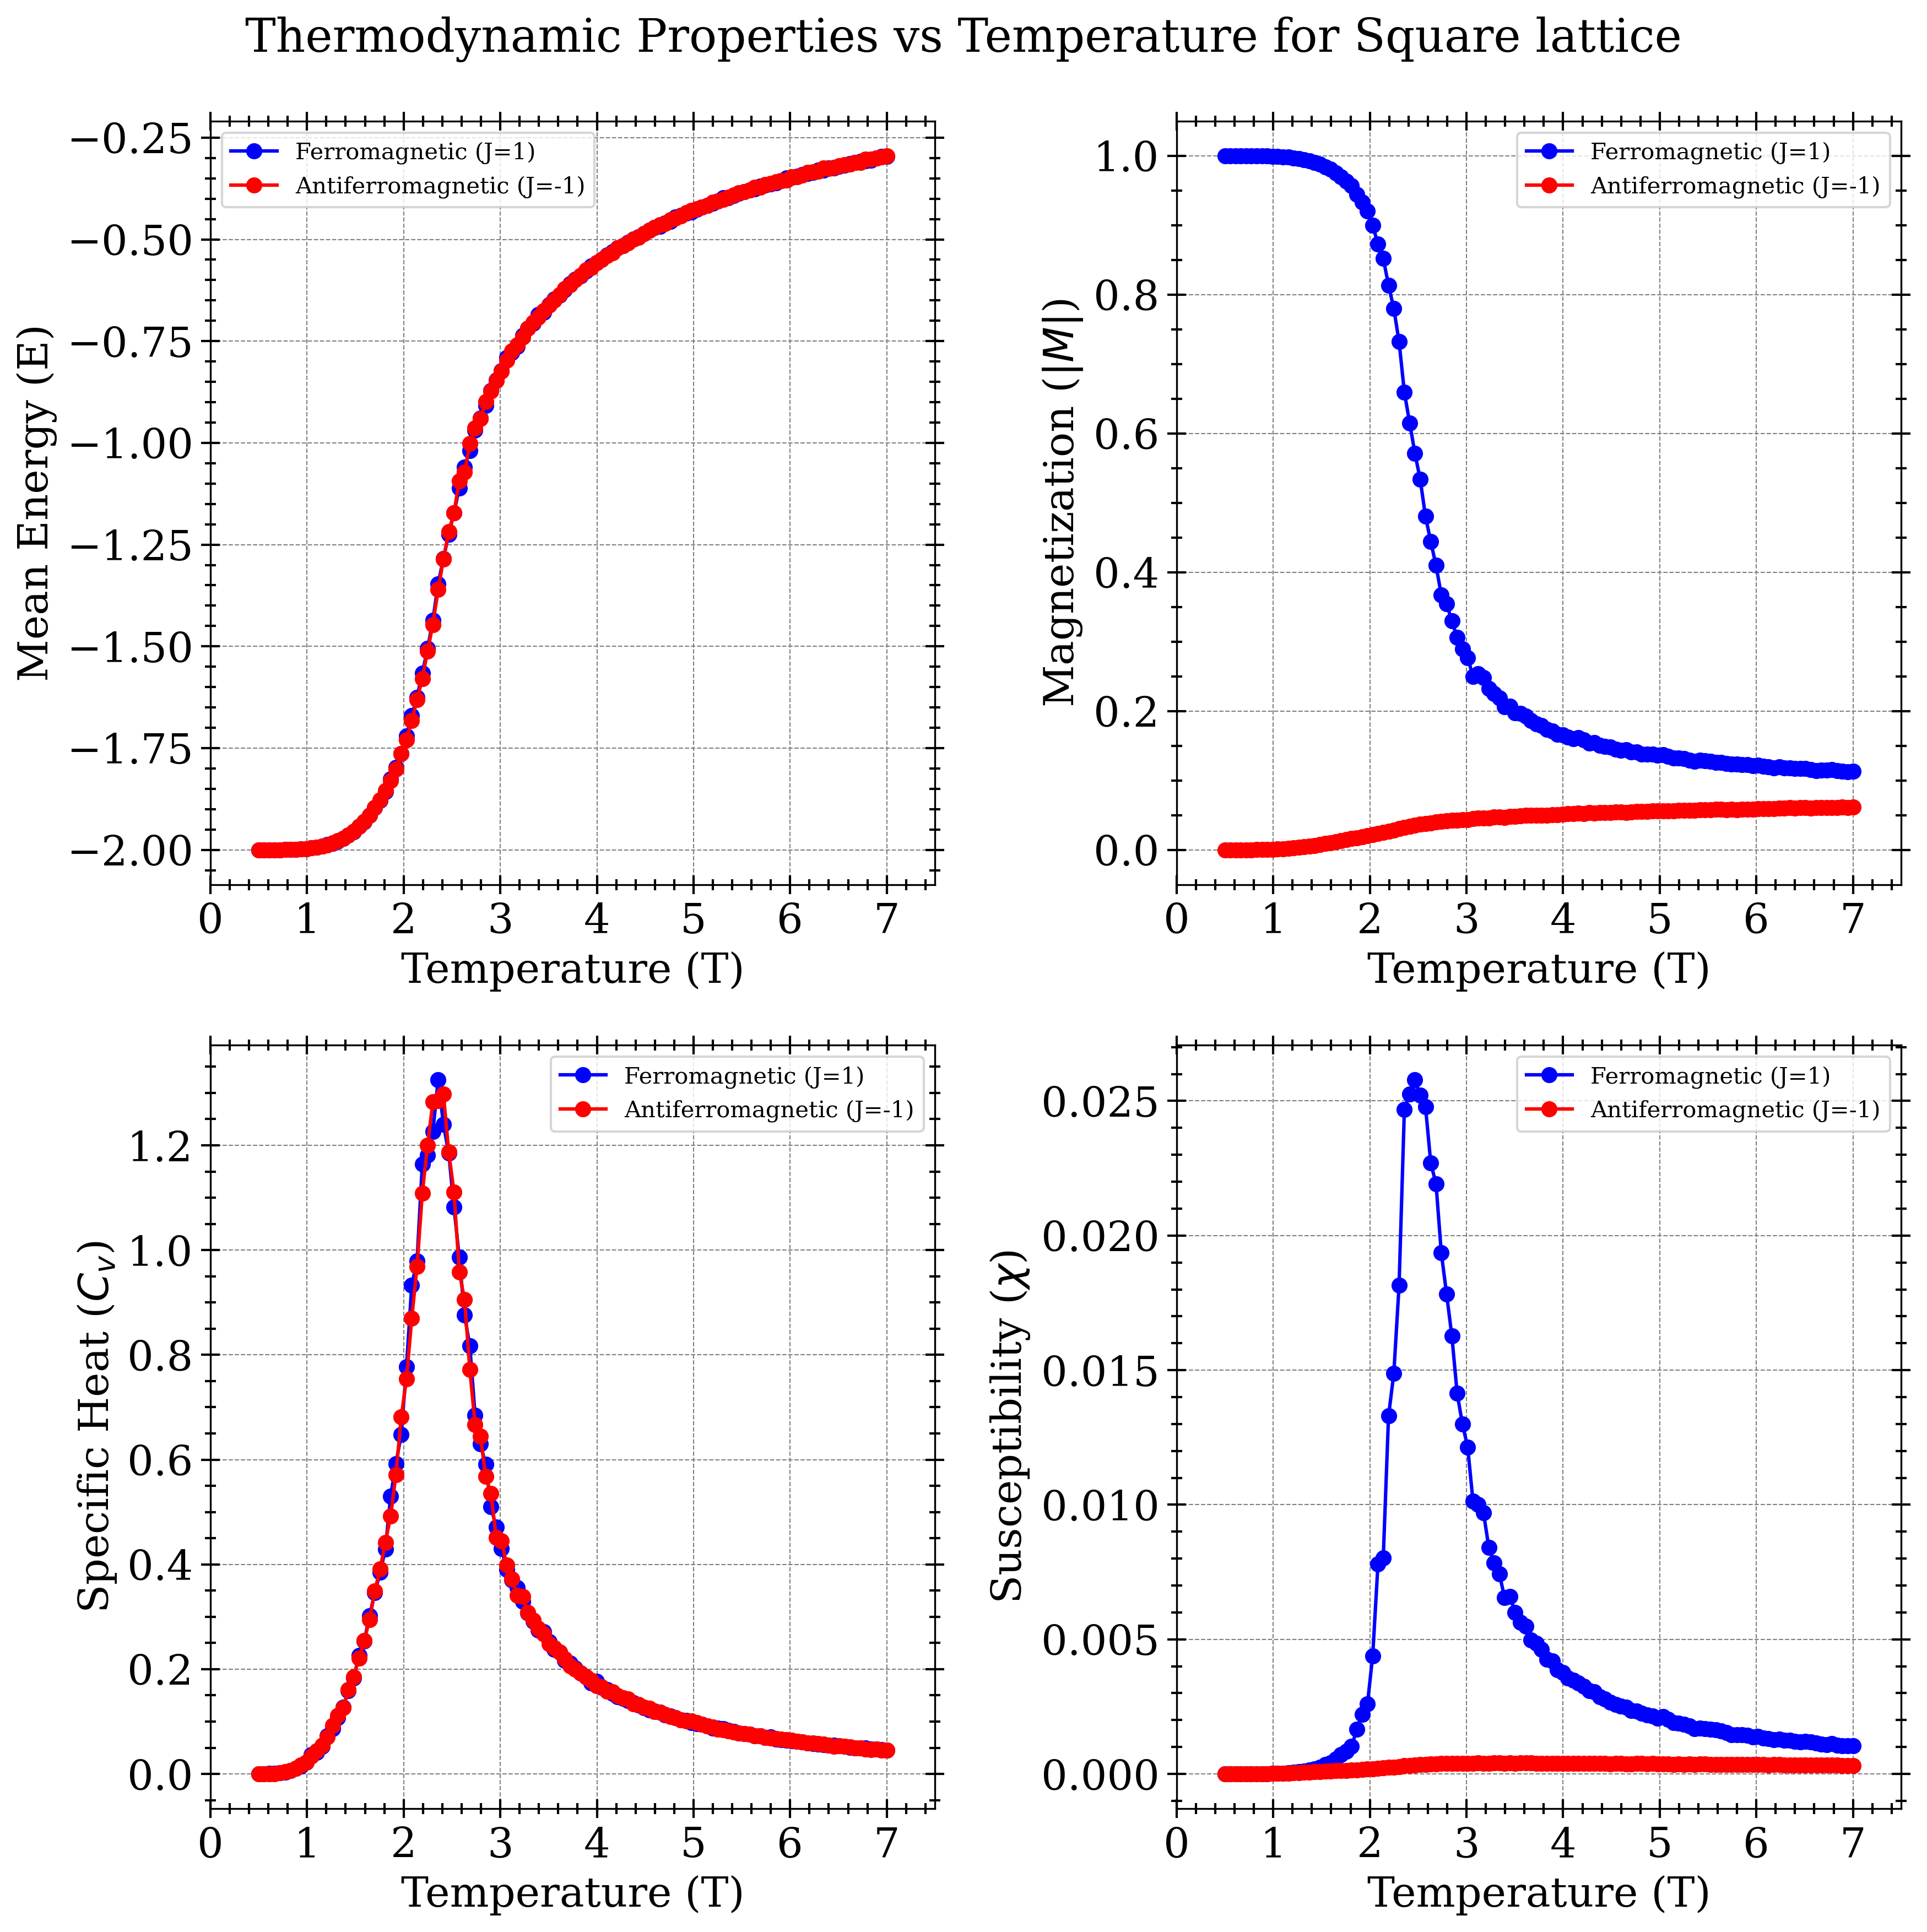

In [10]:
# Plot the results for square lattice for both ferromagnetic and antiferromagentic case together 

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Thermodynamic Properties vs Temperature for Square lattice", fontsize=20)

axes[0,0].plot(t, esfm, 'bo-', label="Ferromagnetic (J=1)")
axes[0,0].plot(t, esafm, 'ro-', label="Antiferromagnetic (J=-1)")
axes[0,0].set_ylabel("Mean Energy (E)")
axes[0,0].set_xlabel("Temperature (T)")
axes[0,0].legend(fontsize=10)
axes[0,0].set_xlim(0,7.5)
axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(8))

axes[0,1].plot(t, msfm, 'bo-', label="Ferromagnetic (J=1)")
axes[0,1].plot(t, msafm, 'ro-', label="Antiferromagnetic (J=-1)")
axes[0,1].set_ylabel("Magnetization ($|M|$)")
axes[0,1].set_xlabel("Temperature (T)")
axes[0,1].legend(fontsize=10)
axes[0,1].set_xlim(0,7.5)
axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(8))

axes[1,0].plot(t, csfm, 'bo-', label="Ferromagnetic (J=1)")
axes[1,0].plot(t, csafm, 'ro-', label="Antiferromagnetic (J=-1)")
axes[1,0].set_ylabel("Specific Heat ($C_{v}$)")
axes[1,0].set_xlabel("Temperature (T)")
axes[1,0].legend(fontsize=10)
axes[1,0].set_xlim(0,7.5)
axes[1,0].xaxis.set_major_locator(plt.MaxNLocator(8))

axes[1,1].plot(t, xsfm, 'bo-', label="Ferromagnetic (J=1)")
axes[1,1].plot(t, xsafm, 'ro-', label="Antiferromagnetic (J=-1)")
axes[1,1].set_ylabel("Susceptibility ($\chi$)")
axes[1,1].set_xlabel("Temperature (T)")
axes[1,1].legend(fontsize=10)
axes[1,1].set_xlim(0,7.5)
axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(8))

plt.tight_layout()
plt.show()

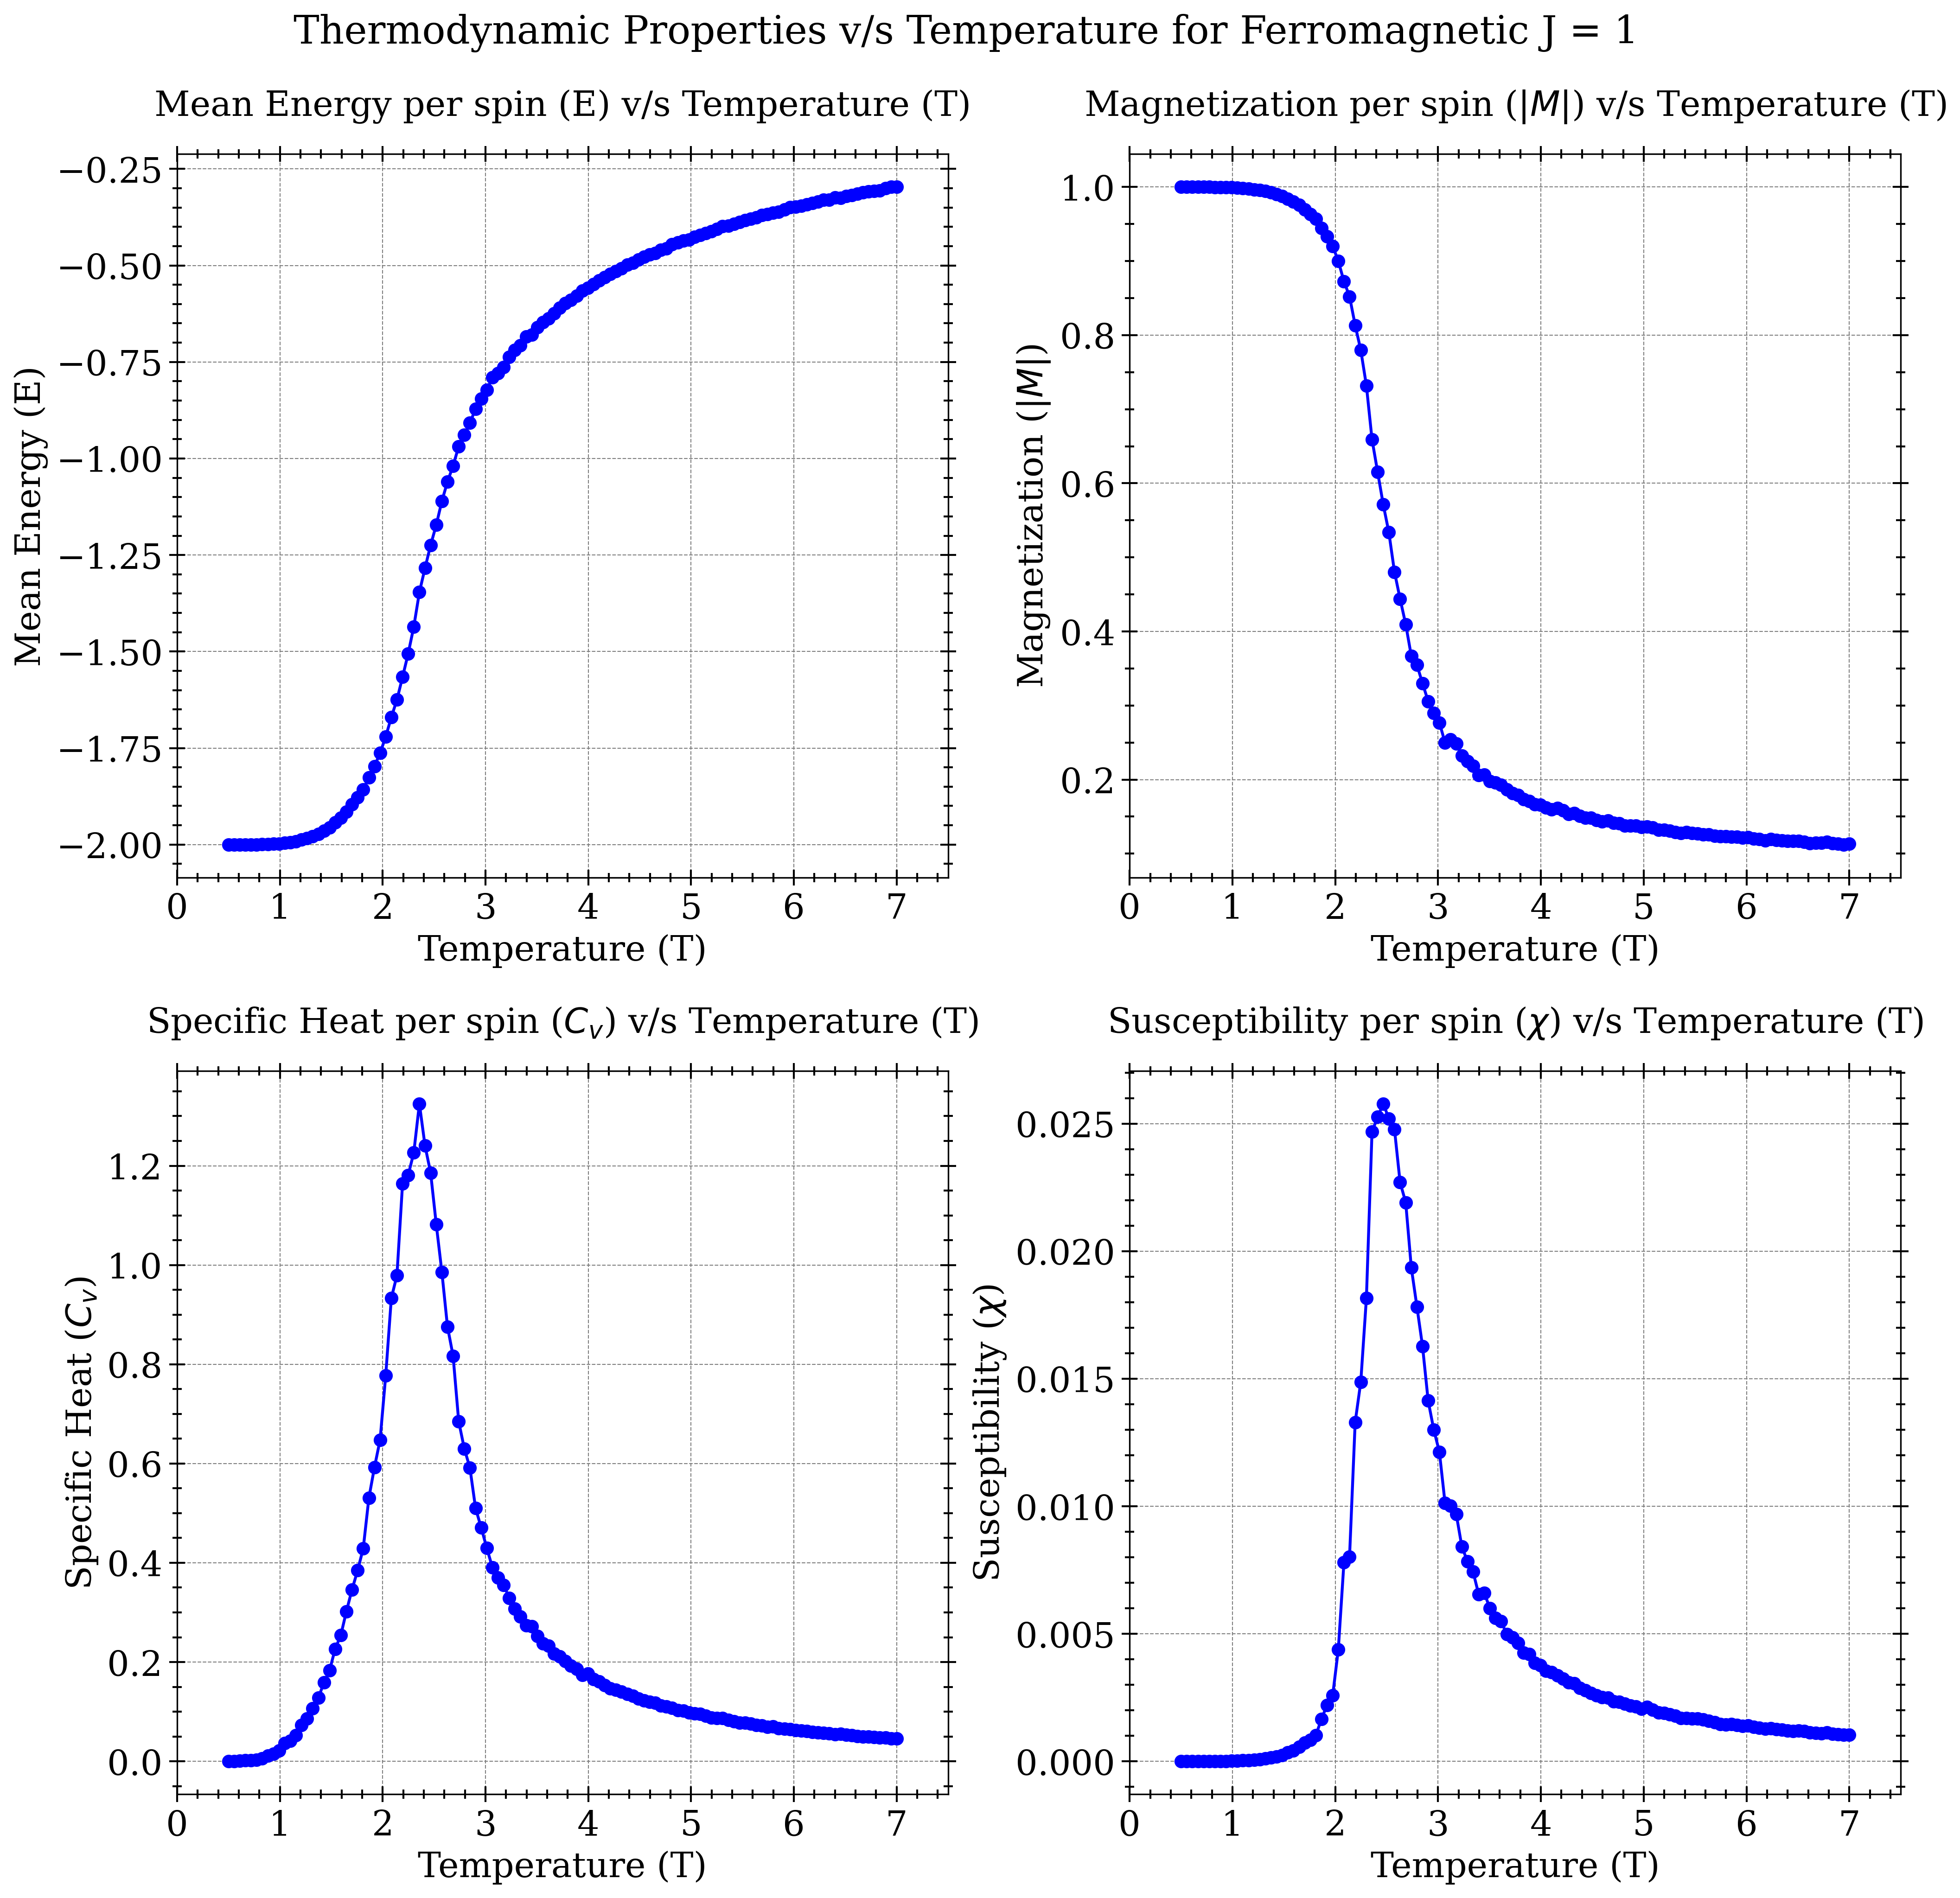

In [11]:
# Plot the results for square lattice for ferromagnetic case

fig, axes = plt.subplots(2, 2, figsize=(14, 14))
fig.suptitle("Thermodynamic Properties v/s Temperature for Ferromagnetic J = 1 ", fontsize=20)
fig.subplots_adjust(top=0.65, wspace=2.5, hspace=1.5)

axes[0,0].plot(t, esfm, 'bo-')
axes[0,0].set_ylabel("Mean Energy per spin (E)")
axes[0,0].set_xlabel("Temperature (T)")
axes[0,0].set_title("Mean Energy per spin (E) v/s Temperature (T)", fontsize=18, pad=20)
axes[0,0].set_xlim(0,7.5)
axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(8))

axes[0,1].plot(t, msfm, 'bo-')
axes[0,1].set_ylabel("Magnetization per spin ($|M|$)")
axes[0,1].set_xlabel("Temperature (T)")
axes[0,1].set_title("Magnetization per spin ($|M|$) v/s Temperature (T)", fontsize=18, pad=20)
axes[0,1].set_xlim(0,7.5)
axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(8))

axes[1,0].plot(t, csfm, 'bo-')
axes[1,0].set_ylabel("Specific Heat per spin ($C_{v}$)")
axes[1,0].set_xlabel("Temperature (T)")
axes[1,0].set_title("Specific Heat per spin ($C_{v}$) v/s Temperature (T)", fontsize=18, pad=20)
axes[1,0].set_xlim(0,7.5)
axes[1,0].xaxis.set_major_locator(plt.MaxNLocator(8))

axes[1,1].plot(t, xsfm, 'bo-')
axes[1,1].set_ylabel("Susceptibility per spin ($\chi$)")
axes[1,1].set_xlabel("Temperature (T)")
axes[1,1].set_title("Susceptibility per spin ($\chi$) v/s Temperature (T)", fontsize=18, pad=20)
axes[1,1].set_xlim(0,7.5)
axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(8))

plt.tight_layout()
plt.savefig('Square Lattice Ferromagnetic.png' ,orientation = 'portrait', dpi=500, bbox_inches='tight')
plt.show()

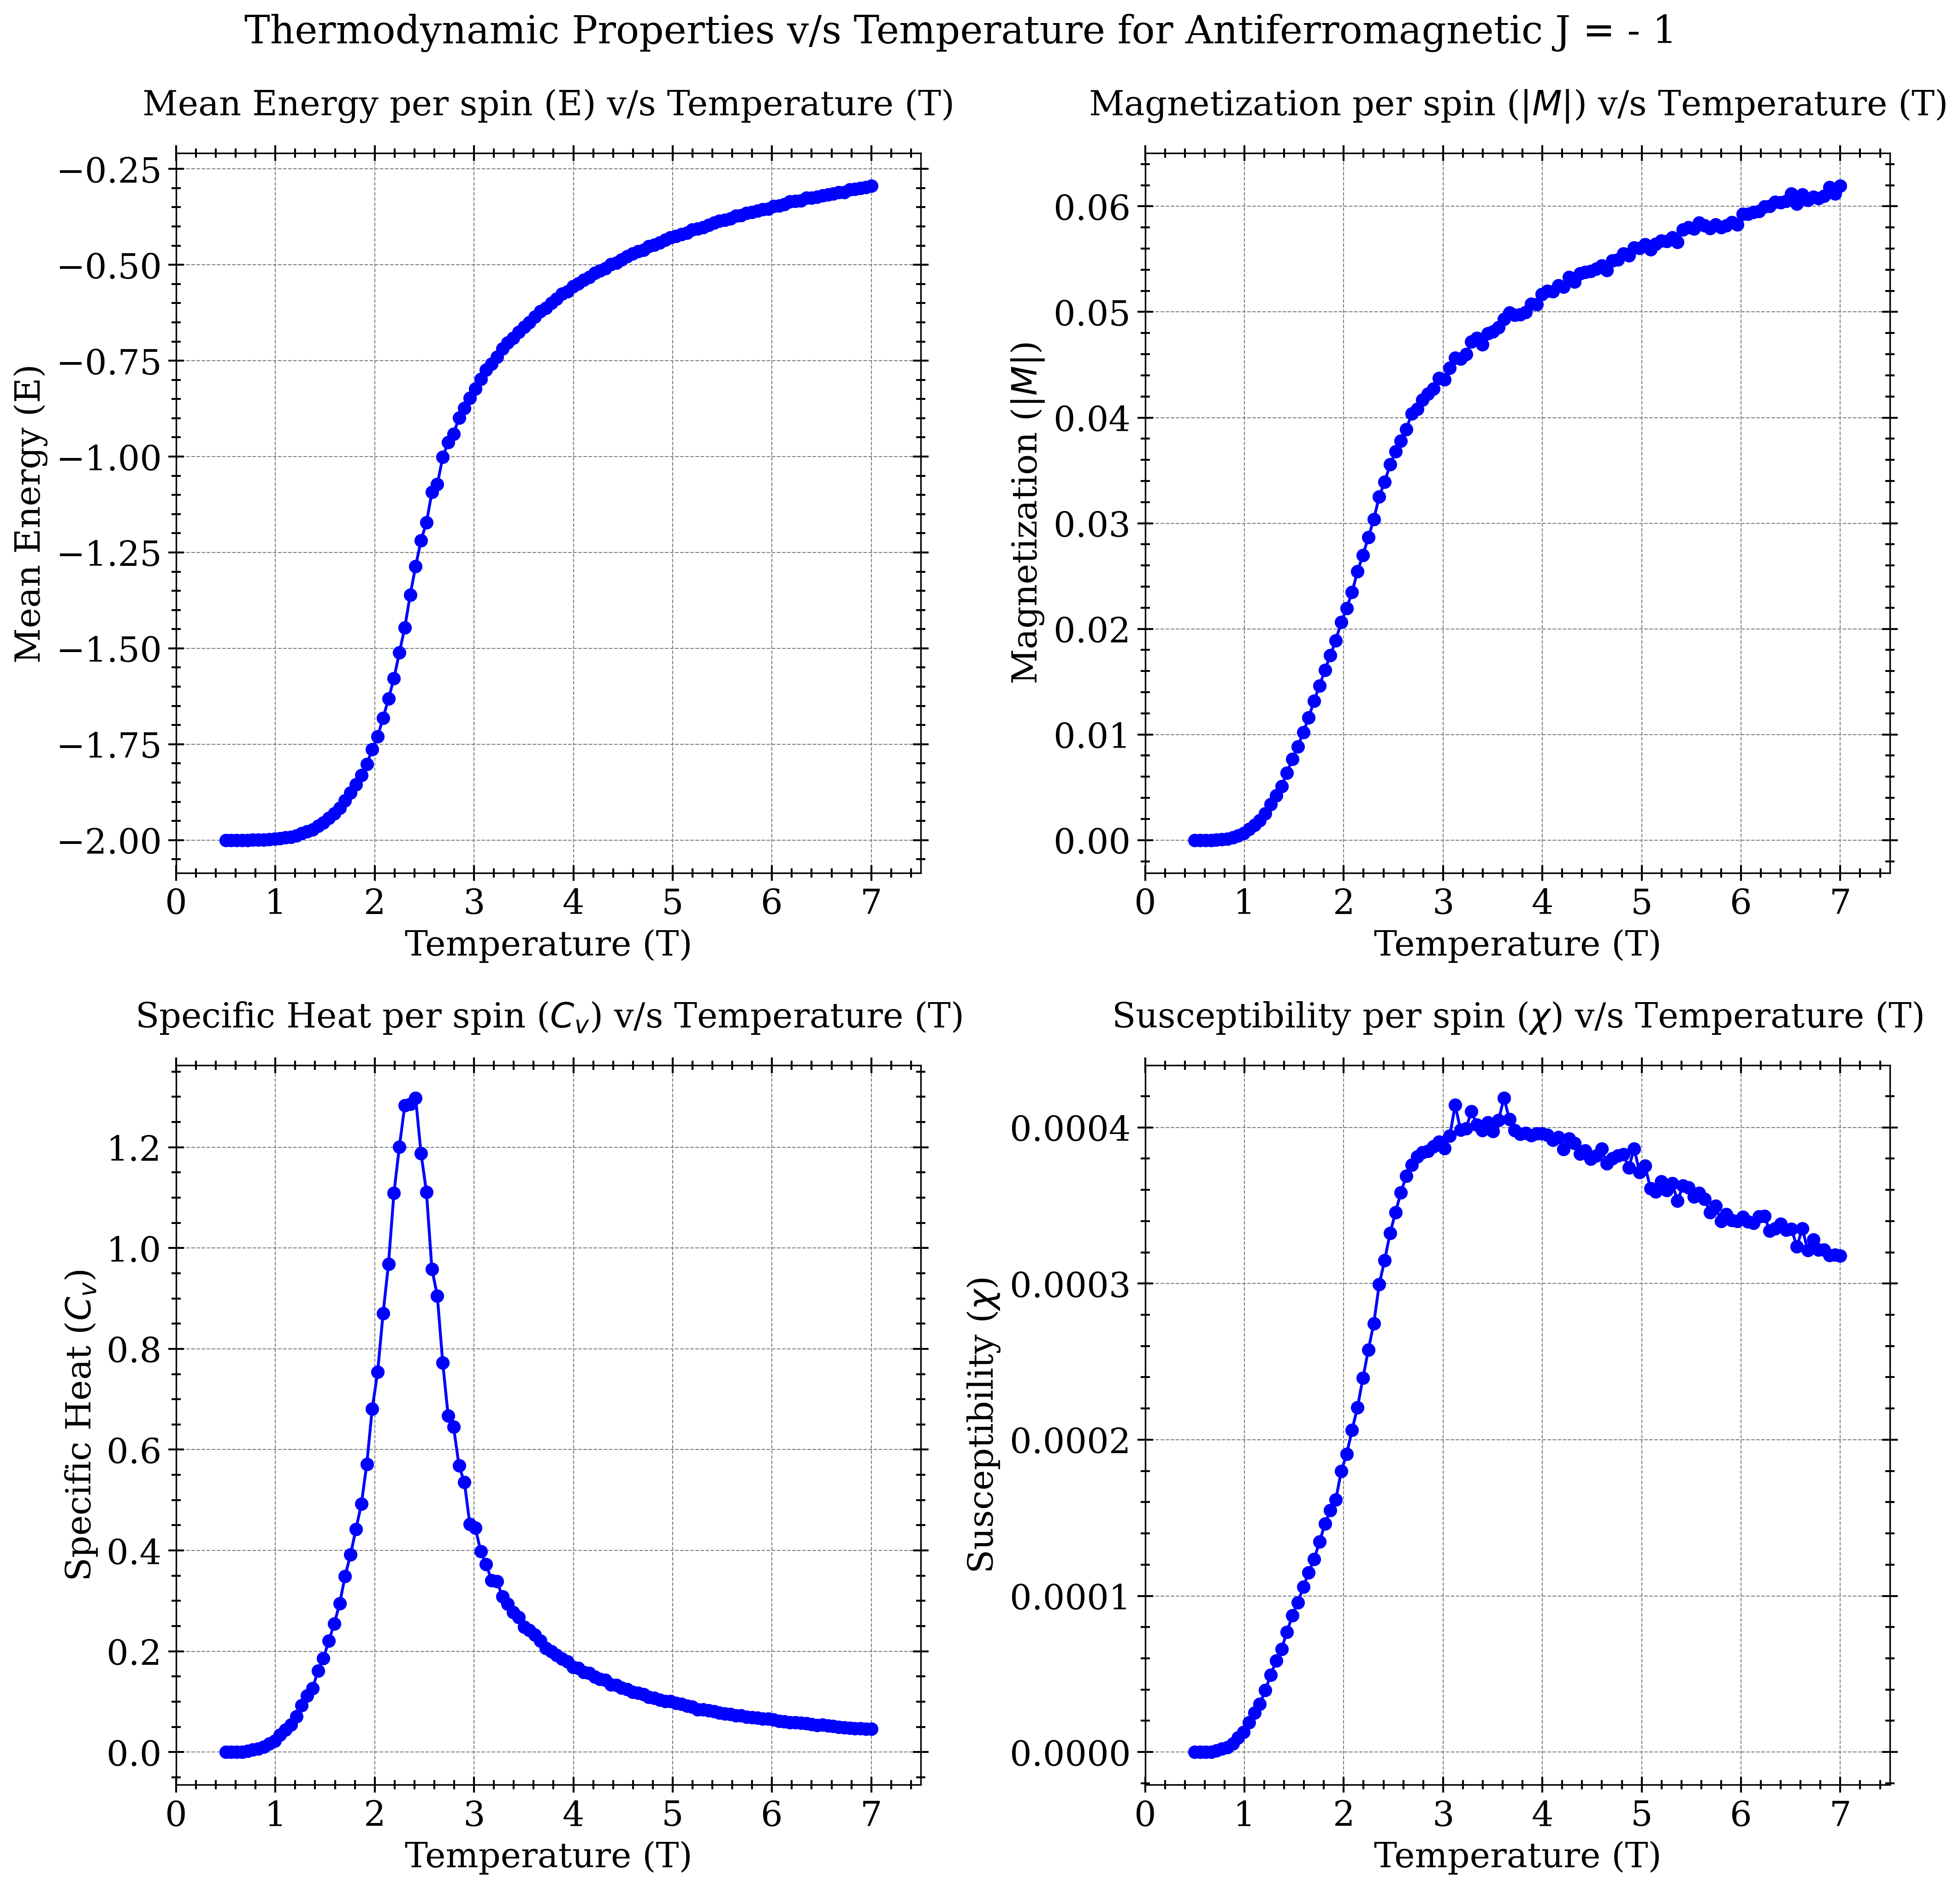

In [12]:
# Plot the results for square lattice for antiferromagnetic case

fig, axes = plt.subplots(2, 2, figsize=(14, 14))
fig.suptitle("Thermodynamic Properties v/s Temperature for Antiferromagnetic J = - 1 ", fontsize=20)
fig.subplots_adjust(top=0.65, wspace=2.5, hspace=1.5)

axes[0,0].plot(t, esafm, 'bo-')
axes[0,0].set_ylabel("Mean Energy per spin (E)")
axes[0,0].set_xlabel("Temperature (T)")
axes[0,0].set_title("Mean Energy per spin (E) v/s Temperature (T)", fontsize=18, pad=20)
axes[0,0].set_xlim(0,7.5)
axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(8))

axes[0,1].plot(t, msafm, 'bo-')
axes[0,1].set_ylabel("Magnetization per spin ($|M|$)")
axes[0,1].set_xlabel("Temperature (T)")
axes[0,1].set_title("Magnetization per spin ($|M|$) v/s Temperature (T)", fontsize=18, pad=20)
axes[0,1].set_xlim(0,7.5)
axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(8))

axes[1,0].plot(t, csafm, 'bo-')
axes[1,0].set_ylabel("Specific Heat per spin ($C_{v}$)")
axes[1,0].set_xlabel("Temperature (T)")
axes[1,0].set_title("Specific Heat per spin ($C_{v}$) v/s Temperature (T)", fontsize=18, pad=20)
axes[1,0].set_xlim(0,7.5)
axes[1,0].xaxis.set_major_locator(plt.MaxNLocator(8))

axes[1,1].plot(t, xsafm, 'bo-')
axes[1,1].set_ylabel("Susceptibility per spin ($\chi$)")
axes[1,1].set_xlabel("Temperature (T)")
axes[1,1].set_title("Susceptibility per spin ($\chi$) v/s Temperature (T)", fontsize=18, pad=20)
axes[1,1].set_xlim(0,7.5)
axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(8))

plt.tight_layout()
plt.savefig('Square Lattice Antiferromagnetic.png' ,orientation = 'portrait', dpi=500, bbox_inches='tight')
plt.show()